In [1]:
from AC2XFLR import *

C:\Users\ejduc\Engineering\AC2XFLR\AC2XFLR.py:107: RuntimeWarning: invalid value encountered in sqrt
  c_fore = K_fore*(1-(2/self.span * y)**2)**0.5
C:\Users\ejduc\Engineering\AC2XFLR\AC2XFLR.py:112: RuntimeWarning: invalid value encountered in sqrt
  c_aft = K_aft*(1-(2/self.span * y)**2)**0.5


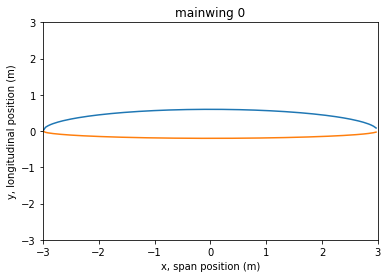

In [2]:
foil = "NACA 0012"
angle_of_attack = 5 #deg
span = 6 #m
root_chord = 0.8 #m
mass = 40 #kg
shape_args = {"shape":"ellipse", "fsmf": 0.75}
_type = "mainwing"
symmetric_fin = False
double_fin = False
draw = True
my_wing = Wing(foil, angle_of_attack, span, root_chord, mass, shape_args, _type, symmetric_fin, double_fin, draw)

In [4]:
my_wing.wingToXML()

AttributeError: 'Wing' object has no attribute 'findouble'